## 6. Kalman Filter for Robot Localization
Simple 1D Kalman Filter for estimating position from noisy measurements.

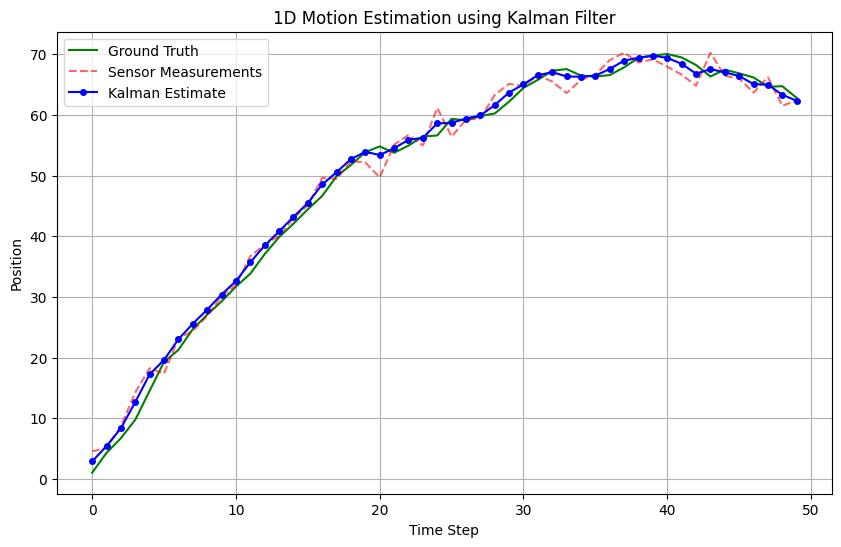

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Time interval
delta_t = 1.0

# Initial state: [position, velocity]
state = np.array([[0], [1]])

# State transition model
F = np.array([[1, delta_t],
              [0, 1]])

# Measurement model (only position is observed)
H = np.array([[1, 0]])

# Noise covariances
process_noise = np.eye(2) * 0.05
measurement_noise = np.eye(1) * 4

# Initial estimation uncertainty
cov_estimate = np.eye(2)

# Data storage
actual_positions = []
sensor_readings = []
kalman_estimates = []

# Simulation and filtering loop
for _ in range(50):
    # Simulate true movement
    state = F @ state
    actual_positions.append(state[0, 0])
    
    # Simulate noisy sensor reading
    measurement = state[0, 0] + np.random.randn() * 2
    sensor_readings.append(measurement)

    # Predict step
    predicted_state = F @ state
    predicted_cov = F @ cov_estimate @ F.T + process_noise

    # Kalman gain computation
    S = H @ predicted_cov @ H.T + measurement_noise
    K = predicted_cov @ H.T @ np.linalg.inv(S)

    # Update step
    state = predicted_state + K @ (measurement - H @ predicted_state)
    cov_estimate = (np.eye(2) - K @ H) @ predicted_cov

    kalman_estimates.append(state[0, 0])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(actual_positions, label='Ground Truth', color='green')
plt.plot(sensor_readings, label='Sensor Measurements', color='red', linestyle='--', alpha=0.6)
plt.plot(kalman_estimates, label='Kalman Estimate', color='blue', marker='o', markersize=4)
plt.title("1D Motion Estimation using Kalman Filter")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()
